Connected to Python 3.12.1

In [1]:
import numpy as np
import matplotlib.pyplot as plt

 Let's explore how to generate a explonential decay in the frequency domain from the dtft formula of e^-x in Adam Panagos's video: Discrete-Time Fourier Transform of Decaying Exponential - Example 02 (https://www.youtube.com/watch?v=fg88ebeYaIQ, 2014)

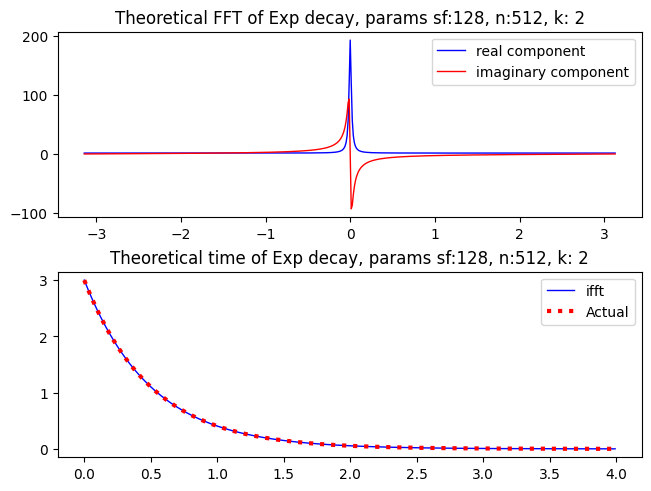

In [2]:
fig, axs = plt.subplots(2,1, layout='constrained')
sf = 128
n = 512
dt = 1/sf
w = np.fft.fftfreq(n)*2*np.pi
wPlot = np.fft.fftshift(w)
t = (np.arange(0, n))/sf
A = 3
k = 2
alpha = 1/np.power(np.e,k/sf)

dtft = A/(1-(alpha*np.exp(-1j*w)))
idtft = np.fft.ifft(dtft)
dtftPlot = np.fft.fftshift(dtft)

axs[0].plot(wPlot, np.real(dtftPlot), c='b', linewidth=1, label = "real component")
axs[0].plot(wPlot, np.imag(dtftPlot), c='r', linewidth=1, label = "imaginary component")
axs[0].set_title("Theoretical FFT of Exp decay, params sf:{}, n:{}, k: {}".format(sf, n, k))
axs[0].legend()


axs[1].plot(t, np.real(idtft), c='b', linewidth=1, label = "ifft")
axs[1].set_title("Calculated time of Exp decay")
axs[1].plot(t, A*np.exp(-t*k), c='r', linewidth=3, linestyle='dotted', label = "Actual")
axs[1].set_title("Theoretical time of Exp decay, params sf:{}, n:{}, k: {}".format(sf, n, k))
axs[1].legend()

 Algebraically, the formula used in the code above can be simplified to subtraction in the exponent.
Furthermore, let's fix the frequencies to represent frequencies determined by the sampling frequency and n.

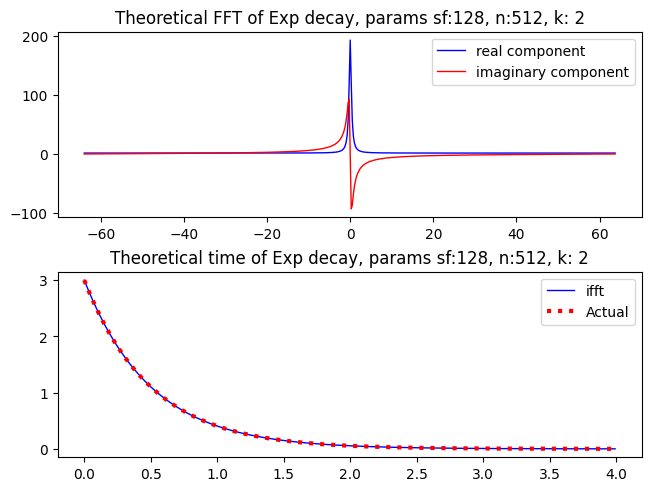

In [3]:
fig, axs = plt.subplots(2,1, layout='constrained')
sf = 128
n = 512
dt = 1/sf
w = np.fft.fftfreq(n, dt)
wPlot = np.fft.fftshift(w)
t = (np.arange(0, n))/sf
A = 3
k = 2

dtft = A/(1-(np.exp(-1j*w*2*np.pi*dt-(k/sf))))
idtft = np.fft.ifft(dtft)
dtftPlot = np.fft.fftshift(dtft)

axs[0].plot(wPlot, np.real(dtftPlot), c='b', linewidth=1, label = "real component")
axs[0].plot(wPlot, np.imag(dtftPlot), c='r', linewidth=1, label = "imaginary component")
axs[0].set_title("Theoretical FFT of Exp decay, params sf:{}, n:{}, k: {}".format(sf, n, k))
axs[0].legend()


axs[1].plot(t, np.real(idtft), c='b', linewidth=1, label = "ifft")
axs[1].set_title("Calculated time of Exp decay")
axs[1].plot(t, A*np.exp(-t*k), c='r', linewidth=3, linestyle='dotted', label = "Actual")
axs[1].set_title("Theoretical time of Exp decay, params sf:{}, n:{}, k: {}".format(sf, n, k))
axs[1].legend()

 From the exploratory test, build a test function and plot test function

In [4]:
def ExpDecayFT(A, k, sf, n):
    """Generates a Discrete Fourier Transform for a right-sided decaying exponential y = Ae^-kx

    Args:
        A (float): Value at t = 0
        k (float): Time multiplier
        sf (int): Sampling Frequency
        n (int): FFT length

    Returns:
        (float, complex array) Frequency values, array of Fourier coefficients to be ifft (freq index: 0, 1, ...,   n/2-1,     -n/2, ..., -1)
    """
    dt = 1/sf
    w = np.fft.fftfreq(n,dt)
    return w, A/(1-(np.exp(-1j*w*2*np.pi*dt - (k/sf))))

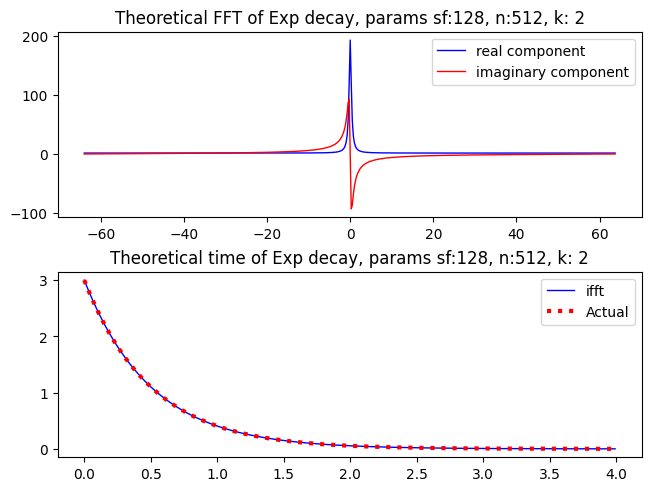

In [5]:
fig, axs = plt.subplots(2,1, layout='constrained')

w, dtft = ExpDecayFT(A=A, k=k, sf=sf, n=n)

idtft = np.fft.ifft(dtft)

axs[0].plot(np.fft.fftshift(w), np.real(np.fft.fftshift(dtft)), c='b', linewidth=1, label = "real component")
axs[0].plot(np.fft.fftshift(w), np.imag(np.fft.fftshift(dtft)), c='r', linewidth=1, label = "imaginary component")
axs[0].set_title("Theoretical FFT of Exp decay, params sf:{}, n:{}, k: {}".format(sf, n, k))
axs[0].legend()


idtft = np.fft.ifft(dtft)

axs[1].plot(t, np.real(idtft), c='b', linewidth=1, label = "ifft")
axs[1].set_title("Calculated time of Exp decay")
axs[1].plot(t, A*np.exp(-t*k), c='r', linewidth=3, linestyle='dotted', label = "Actual")
axs[1].set_title("Theoretical time of Exp decay, params sf:{}, n:{}, k: {}".format(sf, n, k))
axs[1].legend()

 Eventually, we want to shift this to match with the complex morlet wavelet kernel to start in the middle
 Let's use the time shifting property of the DTFT to do this

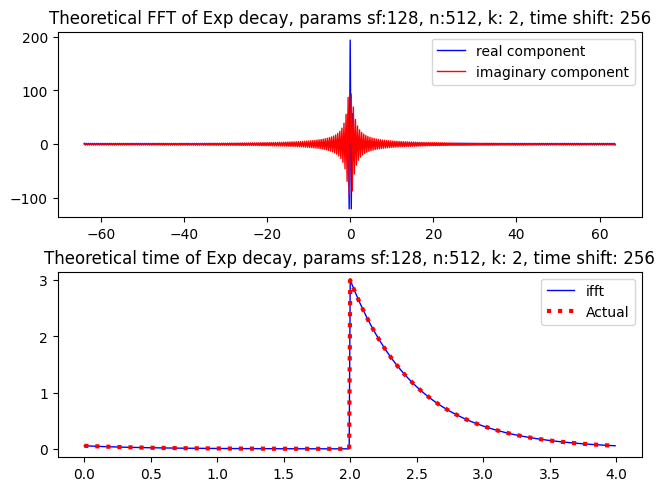

In [6]:
fig, axs = plt.subplots(2,1, layout='constrained')

tShift = int(n/2)

dtftTimeShifted = [np.exp(-1j*w[i]*2*np.pi*dt*tShift)*dtft[i] for i in range(len(dtft))]

idtftTimeShifted = np.fft.ifft(dtftTimeShifted)

axs[0].plot(np.fft.fftshift(w), np.real(np.fft.fftshift(dtftTimeShifted)), c='b', linewidth=1, label = "real component")
axs[0].plot(np.fft.fftshift(w), np.imag(np.fft.fftshift(dtftTimeShifted)), c='r', linewidth=1, label = "imaginary component")
axs[0].set_title("Theoretical FFT of Exp decay, params sf:{}, n:{}, k: {}, time shift: {}".format(sf, n, k, tShift))
axs[0].legend()


idtft = np.fft.ifft(dtft)

axs[1].plot(t, np.real(idtftTimeShifted), c='b', linewidth=1, label = "ifft")
axs[1].set_title("Calculated time of Exp decay")
axs[1].plot(t, np.roll(A*np.exp(-t*k), tShift), c='r', linewidth=3, linestyle='dotted', label = "Actual")
axs[1].set_title("Theoretical time of Exp decay, params sf:{}, n:{}, k: {}, time shift: {}".format(sf, n, k, tShift))
axs[1].legend()

 Let's build this into the function and plot it

In [7]:
def ExpDecayFT(A, k, sf, n, shift = None):
    """Generates a Discrete Fourier Transform for a right-sided decaying exponential y = Ae^-kx

    Args:
        A (float): Value at t = 0
        k (float): Time multiplier
        sf (int): Sampling Frequency
        n (int): FFT length
        shift (float): Time shift the function by n sample points to the right

    Returns:
        (float, complex array) Frequency values, array of Fourier coefficients to be ifft (freq index: 0, 1, ...,   n/2-1,     -n/2, ..., -1)
    """
    dt = 1/sf
    w = np.fft.fftfreq(n,dt)
    fnValues = A/(1-(np.exp(-1j*w*2*np.pi*dt - (k/sf))))
    if shift != None:
        fnValues = [np.exp(-1j*w[i]*2*np.pi*dt*shift)*fnValues[i] for i in range(len(fnValues))]
    return w, fnValues

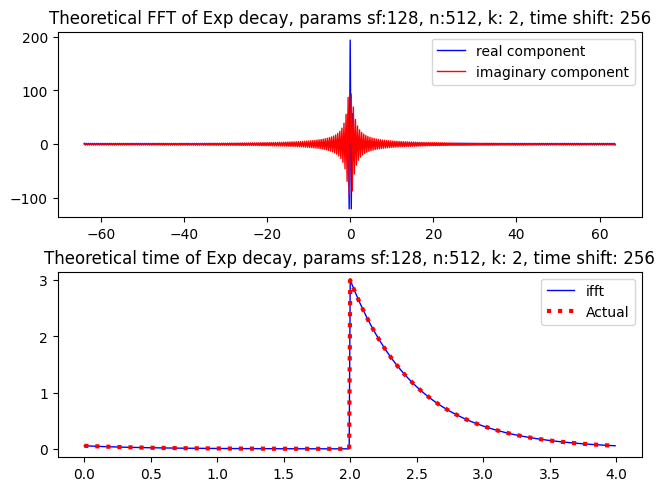

In [8]:
fig, axs = plt.subplots(2,1, layout='constrained')

w, dtft = ExpDecayFT(A=A, k=k, sf=sf, n=n, shift=tShift)

idtft = np.fft.ifft(dtft)

axs[0].plot(np.fft.fftshift(w), np.real(np.fft.fftshift(dtft)), c='b', linewidth=1, label = "real component")
axs[0].plot(np.fft.fftshift(w), np.imag(np.fft.fftshift(dtft)), c='r', linewidth=1, label = "imaginary component")
axs[0].set_title("Theoretical FFT of Exp decay, params sf:{}, n:{}, k: {}, time shift: {}".format(sf, n, k, tShift))
axs[0].legend()


idtft = np.fft.ifft(dtft)

axs[1].plot(t, np.real(idtft), c='b', linewidth=1, label = "ifft")
axs[1].set_title("Calculated time of Exp decay")
axs[1].plot(t, np.roll(A*np.exp(-t*k), tShift), c='r', linewidth=3, linestyle='dotted', label = "Actual")
axs[1].set_title("Theoretical time of Exp decay, params sf:{}, n:{}, k: {}, time shift: {}".format(sf, n, k, tShift))
axs[1].legend()

 For this function to be valid, as per the video, the summation sums time points from zero to positive infinity.
 Notice that when we modify k = 0.5, the error grows for the ifft representation

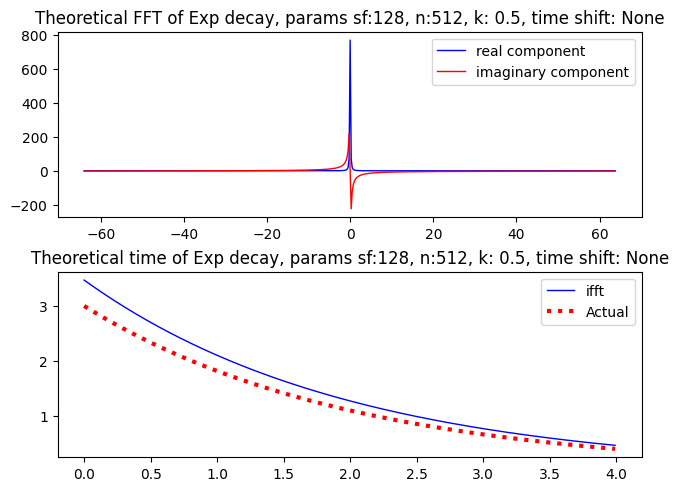

In [9]:
k = 0.5
tShift = None

fig, axs = plt.subplots(2,1, layout='constrained')

w, dtft = ExpDecayFT(A=A, k=k, sf=sf, n=n, shift= tShift)

idtft = np.fft.ifft(dtft)

axs[0].plot(np.fft.fftshift(w), np.real(np.fft.fftshift(dtft)), c='b', linewidth=1, label = "real component")
axs[0].plot(np.fft.fftshift(w), np.imag(np.fft.fftshift(dtft)), c='r', linewidth=1, label = "imaginary component")
axs[0].set_title("Theoretical FFT of Exp decay, params sf:{}, n:{}, k: {}, time shift: {}".format(sf, n, k, tShift))
axs[0].legend()


idtft = np.fft.ifft(dtft)

axs[1].plot(t, np.real(idtft), c='b', linewidth=1, label = "ifft")
axs[1].set_title("Calculated time of Exp decay")
axs[1].plot(t, A*np.exp(-t*k), c='r', linewidth=3, linestyle='dotted', label = "Actual")
axs[1].set_title("Theoretical time of Exp decay, params sf:{}, n:{}, k: {}, time shift: {}".format(sf, n, k, tShift))
axs[1].legend()

 This is because the DFT expects the function at the right most point to be zero.
 Therefore, to keep that point as close as possible to zero, we must keep k to >= 5*sf/n to allow for sufficient decrease in the function

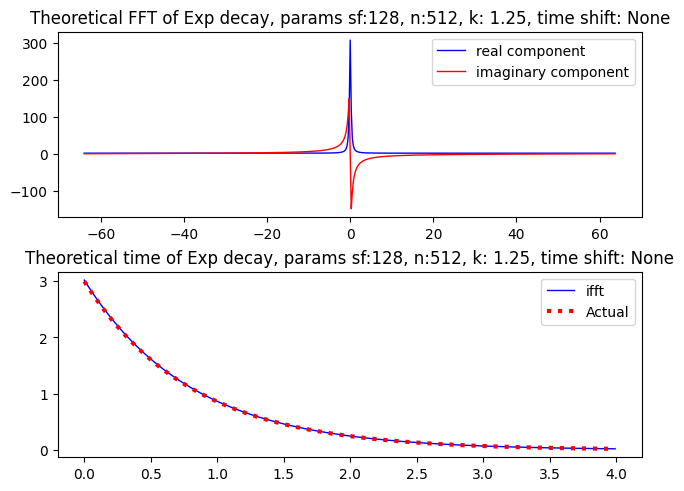

In [10]:
k = 5*sf/n

fig, axs = plt.subplots(2,1, layout='constrained')

w, dtft = ExpDecayFT(A=A, k=k, sf=sf, n=n, shift=tShift)

idtft = np.fft.ifft(dtft)

axs[0].plot(np.fft.fftshift(w), np.real(np.fft.fftshift(dtft)), c='b', linewidth=1, label = "real component")
axs[0].plot(np.fft.fftshift(w), np.imag(np.fft.fftshift(dtft)), c='r', linewidth=1, label = "imaginary component")
axs[0].set_title("Theoretical FFT of Exp decay, params sf:{}, n:{}, k: {}, time shift: {}".format(sf, n, k, tShift))
axs[0].legend()


idtft = np.fft.ifft(dtft)

axs[1].plot(t, np.real(idtft), c='b', linewidth=1, label = "ifft")
axs[1].set_title("Calculated time of Exp decay")
axs[1].plot(t, A*np.exp(-t*k), c='r', linewidth=3, linestyle='dotted', label = "Actual")
axs[1].set_title("Theoretical time of Exp decay, params sf:{}, n:{}, k: {}, time shift: {}".format(sf, n, k, tShift))
axs[1].legend()

 The following is the final function developed from this exploratory process

In [11]:
def ExpDecayRSFT(A, sf, n, k=None, shift = None):
    """Generates a Discrete Fourier Transform for a right-sided decaying exponential y = Ae^-kx

    Args:
        A (float): Value at t = 0
        sf (int): Sampling Frequency
        n (int): FFT length
        k (float): Time multiplier, default recommended value >= 5*sf/n to allow for approximation to infinity
        shift (float): Time shift the function by n sample points to the right

    Returns:
        (float, complex array) Frequency values, array of Fourier coefficients to be ifft (freq index: 0, 1, ...,   n/2-1,     -n/2, ..., -1)
    """
    if k==None:
        k= 5*sf/n
    dt = 1/sf
    w = np.fft.fftfreq(n,dt)
    fnValues = A/(1-(np.exp(-1j*w*2*np.pi*dt - (k/sf))))
    if shift != None:
        fnValues = [np.exp(-1j*w[i]*2*np.pi*dt*shift)*fnValues[i] for i in range(len(fnValues))]
    return w, fnValues

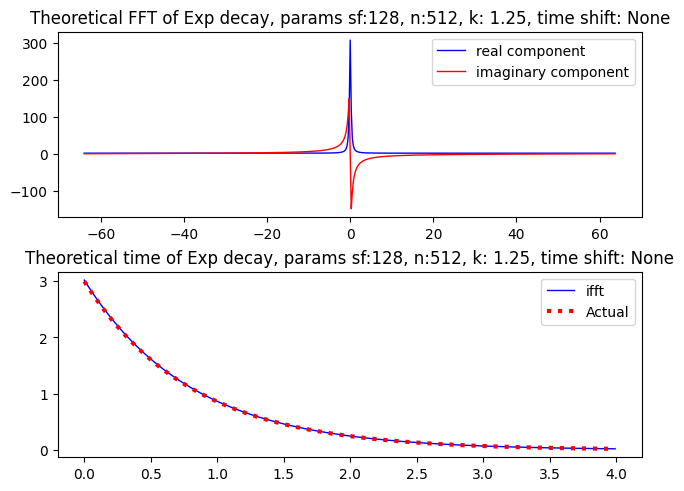

In [12]:
fig, axs = plt.subplots(2,1, layout='constrained')

w, dtft = ExpDecayRSFT(A=A, sf=sf, n=n, shift=tShift)

idtft = np.fft.ifft(dtft)

k=5*sf/n

axs[0].plot(np.fft.fftshift(w), np.real(np.fft.fftshift(dtft)), c='b', linewidth=1, label = "real component")
axs[0].plot(np.fft.fftshift(w), np.imag(np.fft.fftshift(dtft)), c='r', linewidth=1, label = "imaginary component")
axs[0].set_title("Theoretical FFT of Exp decay, params sf:{}, n:{}, k: {}, time shift: {}".format(sf, n, k, tShift))
axs[0].legend()


idtft = np.fft.ifft(dtft)

axs[1].plot(t, np.real(idtft), c='b', linewidth=1, label = "ifft")
axs[1].set_title("Calculated time of Exp decay")
axs[1].plot(t, A*np.exp(-t*k), c='r', linewidth=3, linestyle='dotted', label = "Actual")
axs[1].set_title("Theoretical time of Exp decay, params sf:{}, n:{}, k: {}, time shift: {}".format(sf, n, k, tShift))
axs[1].legend()

 Addendum:
 To generate a left sided exponential decay, we can use the time reversal property of the DFT with the right sided function.
 We will be implement a "Flip Time-Reversal" over here as shown by Richard (Rick) Lyons in his article "The DFT of Finite-Length Time-Reversed Sequences" (https://www.dsprelated.com/showarticle/1315.php, 2019)

In [13]:
def ExpDecayLSFT(A, sf, n, k=None, shift = None, ExpDecayRSFTprecomp = None):
    """Generates a Discrete Fourier Transform for a left-sided decaying exponential y = Ae^kx

    Args:
        A (float): Value at t = 0
        sf (int): Sampling Frequency
        n (int): FFT length
        k (float): Time multiplier, default recommended value >= 5*sf/n to allow for approximation to infinity
        shift (float): Time shift the function by n sample points to the right
        ExpDecayRSFTprecomp (complex array): Precomputed Right-sided exponential decay

    Returns:
        (float, complex array) Frequency values, array of Fourier coefficients to be ifft (freq index: 0, 1, ...,   n/2-1,     -n/2, ..., -1)
    """
    fnValuesIni = ExpDecayRSFTprecomp
    if ExpDecayRSFTprecomp == None:
        _, fnValuesIni = ExpDecayRSFT(A=A, sf=sf, n=n, k=k)
    fnValues = [np.conjugate(fnValuesIni[i])*np.exp(1j*w[i]*2*np.pi/sf) for i in range(n)]

    return w, fnValues

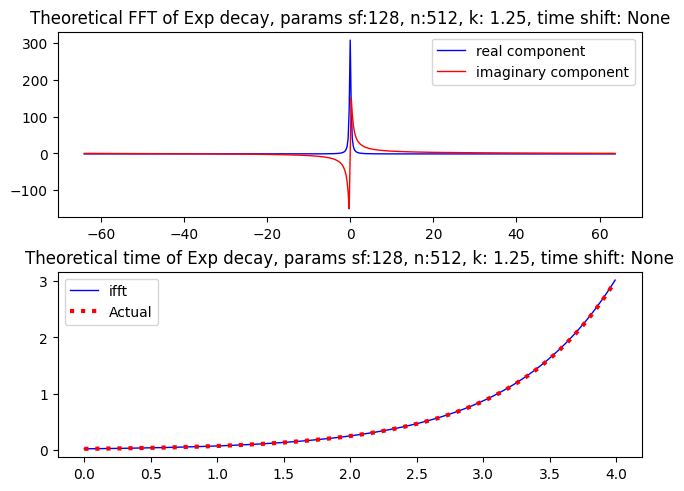

In [14]:
fig, axs = plt.subplots(2,1, layout='constrained')

w, dtft = ExpDecayLSFT(A=A, sf=sf, n=n, shift=tShift)

idtft = np.fft.ifft(dtft)

k=5*sf/n

axs[0].plot(np.fft.fftshift(w), np.real(np.fft.fftshift(dtft)), c='b', linewidth=1, label = "real component")
axs[0].plot(np.fft.fftshift(w), np.imag(np.fft.fftshift(dtft)), c='r', linewidth=1, label = "imaginary component")
axs[0].set_title("Theoretical FFT of Exp decay, params sf:{}, n:{}, k: {}, time shift: {}".format(sf, n, k, tShift))
axs[0].legend()


idtft = np.fft.ifft(dtft)

axs[1].plot(t, np.real(idtft), c='b', linewidth=1, label = "ifft")
axs[1].set_title("Calculated time of Exp decay")
axs[1].plot(t, [A*np.exp(-t*k)[int(np.mod(-(i+1), n))] for i in range(n)], c='r', linewidth=3, linestyle='dotted', label = "Actual")
axs[1].set_title("Theoretical time of Exp decay, params sf:{}, n:{}, k: {}, time shift: {}".format(sf, n, k, tShift))
axs[1].legend()